In [505]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [506]:
df = pd.read_csv("unsupervised-learning-on-country-data/Country-data.csv")

In [507]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [509]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, 1:])
scaled_data

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [510]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier

In [517]:
n_clusters = 3
random_state = 42

kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)

kmeans.fit(scaled_data)

labels = kmeans.labels_

# data = data.copy()
df["class"] = labels

In [523]:
poor = int(df[df.country=='Burundi']['class'])
rich = int(df[df.country=='Luxembourg']['class'])

def apply_need(obj):
    if obj == poor:
        return 'Poor countries'
    elif obj == rich:
        return 'Rich countries'
    else:
        return 'Middle countries'

df['need'] = df["class"].apply(apply_need)

/tmp/ipykernel_7173/3468033074.py:1: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead

/tmp/ipykernel_7173/3468033074.py:2: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



In [524]:
df[df["class"] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class,need
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,Middle countries
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,Middle countries
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,Middle countries
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0,Middle countries
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0,Middle countries
...,...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,0,Middle countries
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0,Middle countries
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,Middle countries
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,Middle countries


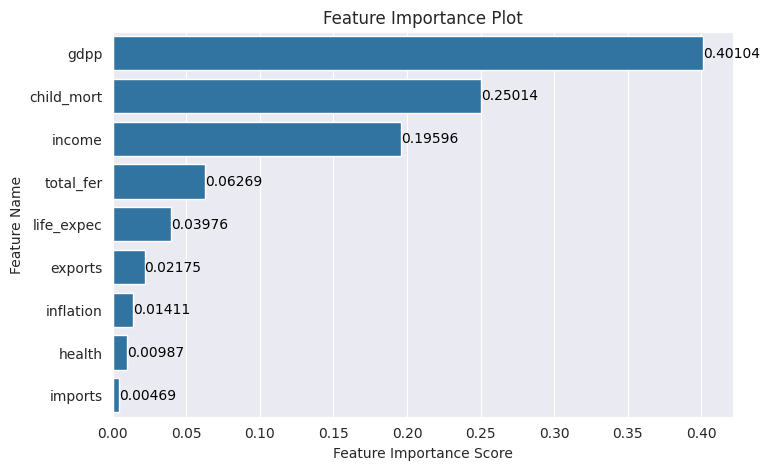

In [526]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

X = df.drop(["country","class", "need"], axis=1)
# X = df.drop(["country","class"], axis=1)
y = df["class"]

xgb.fit(X, y)

feature_names = xgb.get_booster().feature_names

importance_scores = xgb.feature_importances_

temp = {"feature_names": feature_names, "importance_scores": importance_scores}
temp = pd.DataFrame(temp)
temp = temp.sort_values("importance_scores", ascending=False)


plt.figure(figsize=(8, 5))
sns.set_style("darkgrid")
sns.barplot(x="importance_scores", y="feature_names", data=temp)

for index, value in enumerate(temp['importance_scores']):
    plt.text(value, index, f'{value:.5f}', ha='left', va='center', color="Black")

plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Name')
plt.title('Feature Importance Plot')
plt.show()

In [527]:
import plotly.express as px

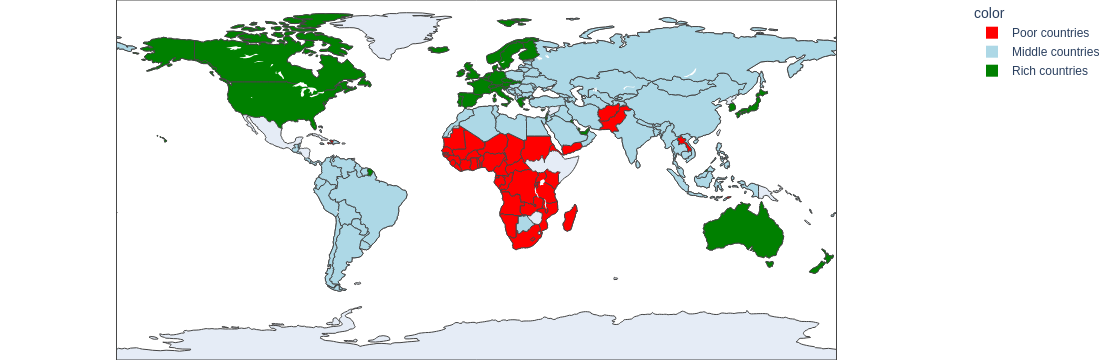

In [530]:
fig = px.choropleth(df[['country','class']],
                    locationmode = 'country names',
                    locations = 'country',
                    color = df['need'],  
                    color_discrete_map = {'Rich countries': 'Green',
                                          'Middle countries':'LightBlue',
                                          'Poor countries':'Red'}
                   )

fig.update_layout(
        margin = dict(
                l=0,
                r=0,
                b=0,
                t=0,
                pad=2,
            ),
    )
fig.show()

Dividing Criteria: Child mortality, Exports, Health, Imports, Income, Inflation, Life expectency, Total_fer, GDPP

In [532]:
df.head(15)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class,need
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,2,Poor countries
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0,Middle countries
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0,Middle countries
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,2,Poor countries
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0,Middle countries
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0,Middle countries
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0,Middle countries
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1,Rich countries
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1,Rich countries
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0,Middle countries
